In [1]:
'''Import section'''

from __future__ import print_function
from __future__ import absolute_import


import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas as pd


In [13]:
# #Later used for labeling tree data output. 

# openfish = pd.read_csv('phishurls.txt_results.csv')
# alexa = pd.read_csv('top_sites.txt_results.csv')



# # alexa = alexa.drop([0])
# frames = [openfish,alexa]
# merged = pd.concat(frames)
# merged.to_csv("output.csv", index=False)


# #merged.head()
# merged.info()

#Later used for labeling tree data output. 

openfish = pd.read_csv('phishurlsresultswolength.csv')
alexa = pd.read_csv('top_wolength.txt_results.csv')



# alexa = alexa.drop([0])
frames = [openfish,alexa]
merged = pd.concat(frames)
merged.to_csv("output.csv", index=False)


#merged.head()
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17380 entries, 0 to 972
Data columns (total 22 columns):
havingIP                    17380 non-null int64
urlOfAnchor                 17380 non-null int64
redirect                    17380 non-null int64
linksInTags                 17380 non-null int64
domainRegistrationLength    17380 non-null int64
havingAtSymbol              17380 non-null int64
doubleSlashRedirecting      17380 non-null int64
port                        17380 non-null int64
popUpWindow                 17380 non-null int64
httpsToken                  17380 non-null int64
sfh                         17380 non-null int64
onMouseOver                 17380 non-null int64
abnormalUrl                 17380 non-null int64
favicon                     17380 non-null int64
getageOfDomain              17380 non-null int64
prefixSuffix                17380 non-null int64
usingIPAddress              17380 non-null int64
havingSubDomain             17380 non-null int64
dnsRecord  

In [14]:
training_data = np.genfromtxt('output.csv',delimiter=',',dtype=np.int32)

print(len(merged.columns))


22


In [15]:
#Split data into x(features) and y(label)
inputs = training_data[:,:-1]
outputs = training_data[:,-1]


#split data by 20%
x_train ,x_test,y_train, y_test = train_test_split(inputs,outputs,test_size=0.25)       #test_size=0.2(whole_data)

print(len(x_test))
print(len(x_train))

4346
13035


In [2]:
lgr_test = LogisticRegression()

lgr_test.fit(x_train,y_train)

NameError: name 'LogisticRegression' is not defined

In [1]:
predictions = lgr_test.predict(x_test)

accuracy = 100.0 * accuracy_score(y_test, predictions)

print ("The accuracy of your Logistic Regression on testing data is: " + str(accuracy))



NameError: name 'lgr_test' is not defined

In [101]:
tree_test = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf=5, splitter='best')
# criterion="entropy"
tree_test.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
tree_prediction = tree_test.predict(x_test)

accuracy = 100.0 * accuracy_score(y_test, tree_prediction)

print ("The accuracy of your Tree on testing data is: " + str(accuracy))

The accuracy of your Tree on testing data is: 94.68476760239301


In [104]:
from sklearn.tree import export_graphviz

export_graphviz(tree_test, out_file='tree_limited.dot',
                rounded = True, proportion = False, precision = 2, filled = True, feature_names=merged.columns[:-1])

!dot -Tpng tree_limited.dot -o tree_limited.png

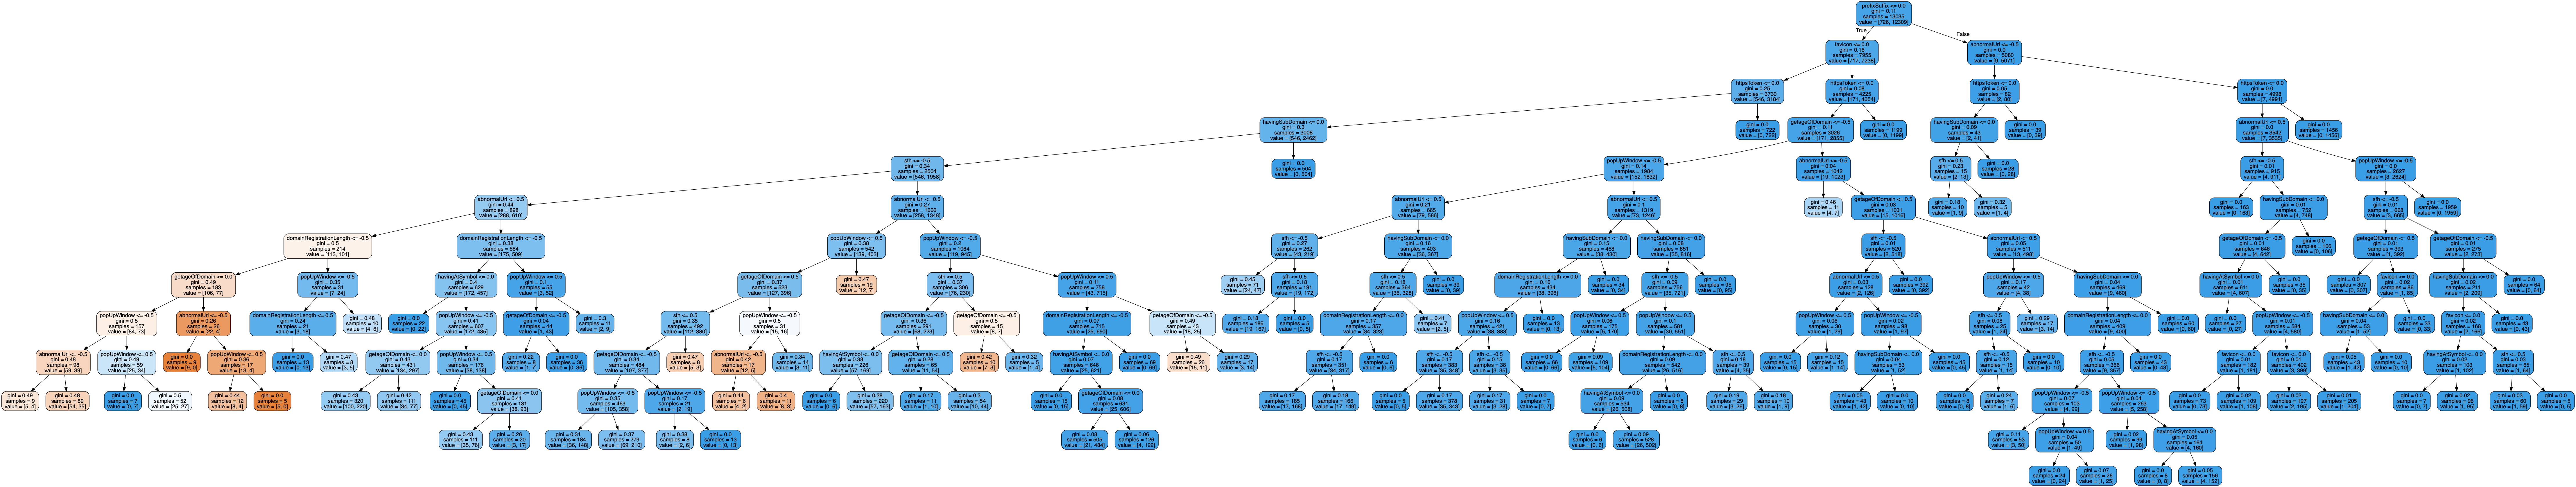

In [105]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [22]:
from sklearn.feature_selection import RFE

In [58]:
selector = RFE(lgr_test, 14, step=1)

In [59]:
selector.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=14, step=1, verbose=0)

In [60]:
selector.ranking_

array([1, 1, 5, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 6, 7, 8])

In [61]:
selector.transform(x_test)



array([[-1, -1, -1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       [-1, -1,  0, ...,  1,  1, -1],
       ...,
       [-1, -1, -1, ..., -1,  1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       [-1, -1, -1, ..., -1,  1, -1]], dtype=int32)

In [62]:
selector.score(x_test, y_test)

0.9454670961803958

In [65]:
selector.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False])

In [ ]:
percents = []